<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_Class22_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CST3512 Class 22    
**k-means Clustering Introduction**    
*with Python and scikit-learn*    

from **[Getting started with k-means clustering in Python](https://blog.dominodatalab.com/getting-started-with-k-means-clustering-in-python)**    
by: Dr. J Rogel-Salazar on April 1, 2022    



**This notebook has three sections:**     

1. Calculating k-Means without Scikit-learn    
2. Calcuating the Optimal Number of Clusters    
3. k-Means Clustering Using Scikit-learn    



---



Imagine you are an accomplished marketeer establishing a new campaign for a product and want to find appropriate segments to target, or you are lawyer interested in grouping together different documents depending on their content, or you are analysing credit card transactions to identify similar patterns. In all those cases, and many more, data science can be used to help clustering your data. Clustering analysis is an important area of unsupervised learning that helps us group data together. We have discussed in the Domino blog the [difference between supervised and unsupervised learning in the past](https://blog.dominodatalab.com/supervised-vs-unsupervised-learning). As a reminder, we use unsupervised learning when labelled data is not available for our purposes but we want to explore common features in the data. In the examples above, as a marketeer we may find common demographic characteristics in our target audience, or as a lawyer we establish different common themes in the documents in question or, as a fraud analyst we establish common transactions that may highlight outliers in someone’s account.    


In all those cases, clustering offers a hand at finding those common traces and there are a variety of clustering algorithms out there. In a previous Domino post,  we talked about [density based clustering](https://blog.dominodatalab.com/topology-and-density-based-clustering) where we discussed its use in anomaly detection, similar to the credit card transactions use-case above. In that post we argued that other algorithms may be easier to understand and implement, for example k-means, and the aim of this post if to do exactly that.    


We will first establish the notion of a cluster and determine an important part in the implementation of k-means: centroids. We will see how k-means approaches the issue of similarity and how the groups are updated on every iteration until a stopping condition is met. We will illustrate this with a Python implementation and will finish by looking at how to use this algorithm via the [Scikit-learn library](https://scikit-learn.org/stable/modules/clustering.html#k-means).    


You can use the code in this post in your own machine or in Colab, provided you have Python 3.x installed.     




---



#1. Calculating k-Means without Scikit-learn    


##K-Means - What Does It Mean?    

We mentioned that we are interested in finding out commonalities among our data observations. One way to determine that commonality or similarity is through a measure of distance among the data points. The shorter the distance, the more similar the observations are. There are different ways in which we can measure that distance and one that is very familiar to a lot of people is the Euclidean distance. That’s right! The same one we are taught when learning thePythagorean theorem. Let us take a look and consider two data observations over two attributes *a* and *b*. Point*p1*  has coordinates *(a1,b1)* and point *p2* has coordinates *(a2,b2)*.

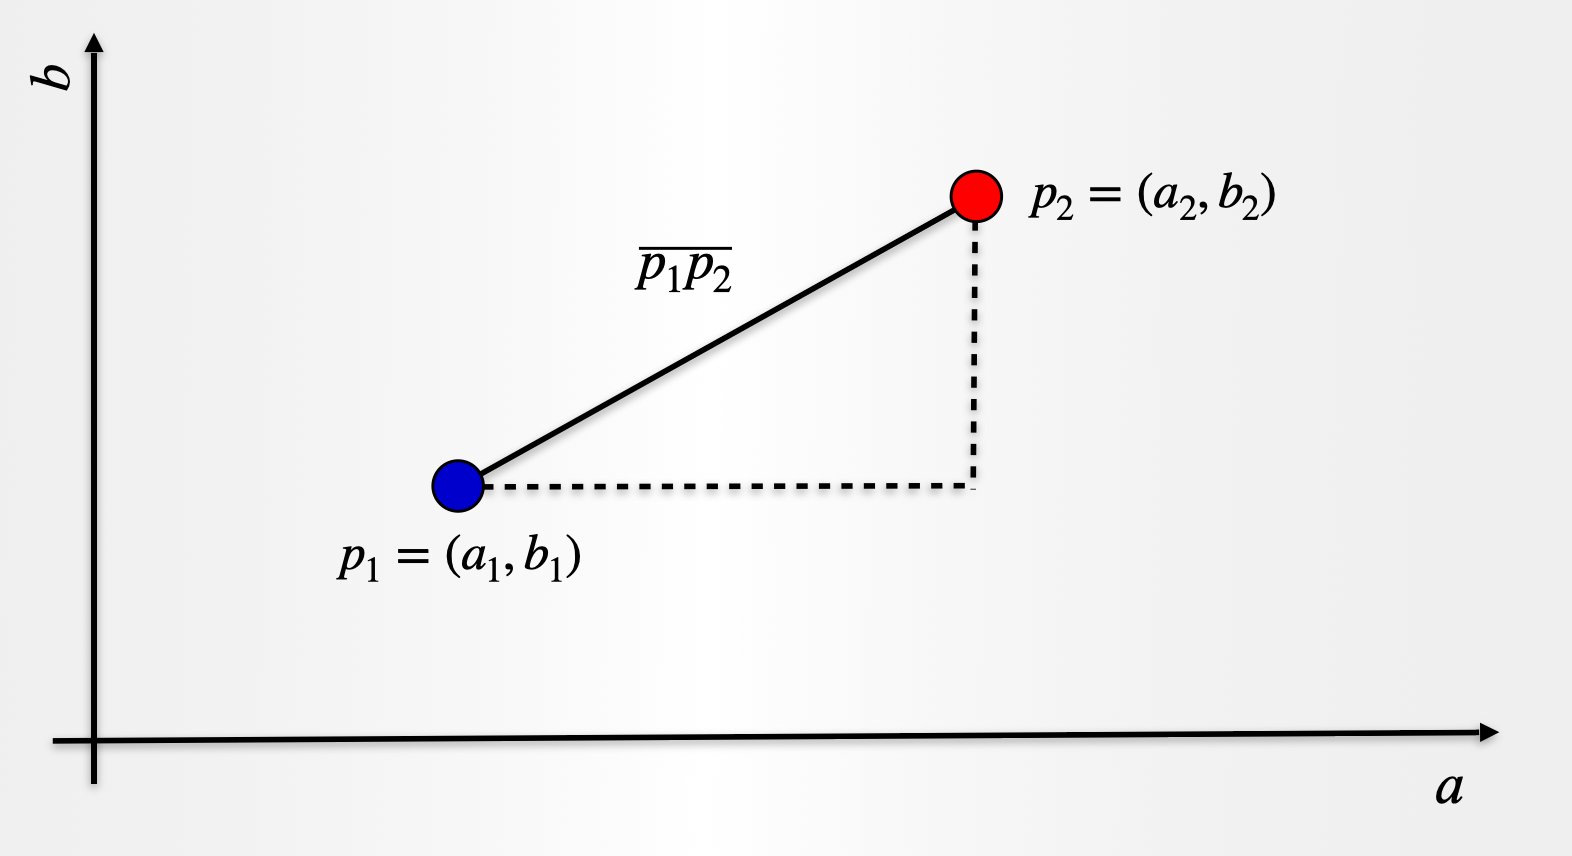

The distance *p1p2* is given by:

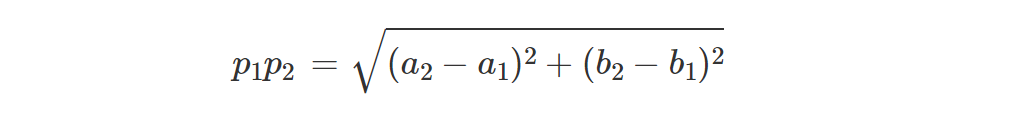

The expression above can be extended to more than 2 attributes and the distance can be measured between any two points. For a dataset with *n* observations, we assume there are *k* groups or clusters, and our aim is to determine which observation corresponds to any of those *k* groups. This is an important point to emphasise: the algorithm will not give us the number of clusters, instead we need to define the number *k* in advance. We may be able to run the algorithm with different values for *k* and determine the best possible solution.

In a nutshell, *k*-means clustering tries to minimise the distances between the observations that belong to a cluster and maximise the distance between the different clusters. In that way, we have cohesion between the observations that belong to a group, while observations that belong to a different group are kept further apart. Please note that as we explained in this post, *k*-means is exhaustive in the sense that every single observation in the dataset will be forced to be part of one of the *k* clusters assumed.

It should now be clear where the *k* in *k*-means comes from, but what about the “means” part? Well, it turns out that as part of the algorithm we are also looking to identify the centre for each cluster. We call this a *centroid*, and as we assign observations to one cluster or the other, we update the position of the cluster *centroid*. This is done by taking the mean (average if you will) of all the data points that have been included in that cluster. Easy!

##A Recipe for k-means

The recipe for *k*-means is quite straightforward.    

1.  Decide how many clusters you want, i.e. choose *k*    
2.  Randomly assign a centroid to each of the *k* clusters    
3.  Calculate the distance of all observation to each of the *k* *centroids*    
4.  Assign observations to the closest *centroid*    
5.  Find the new location of the *centroid* by taking the mean of all the observations in each cluster    
6.  Repeat steps 3-5 until the centroids do not change position   

Et voilà!    

Take a look at the representation below where the steps are depicted in a schematic way for a 2-dimensional space. The same steps can be applied to more dimensions (i.e. more features or attributes). For simplicity, in the schematic we only show the distance measured to the closest centroid, but in practice all distances need to be considered.

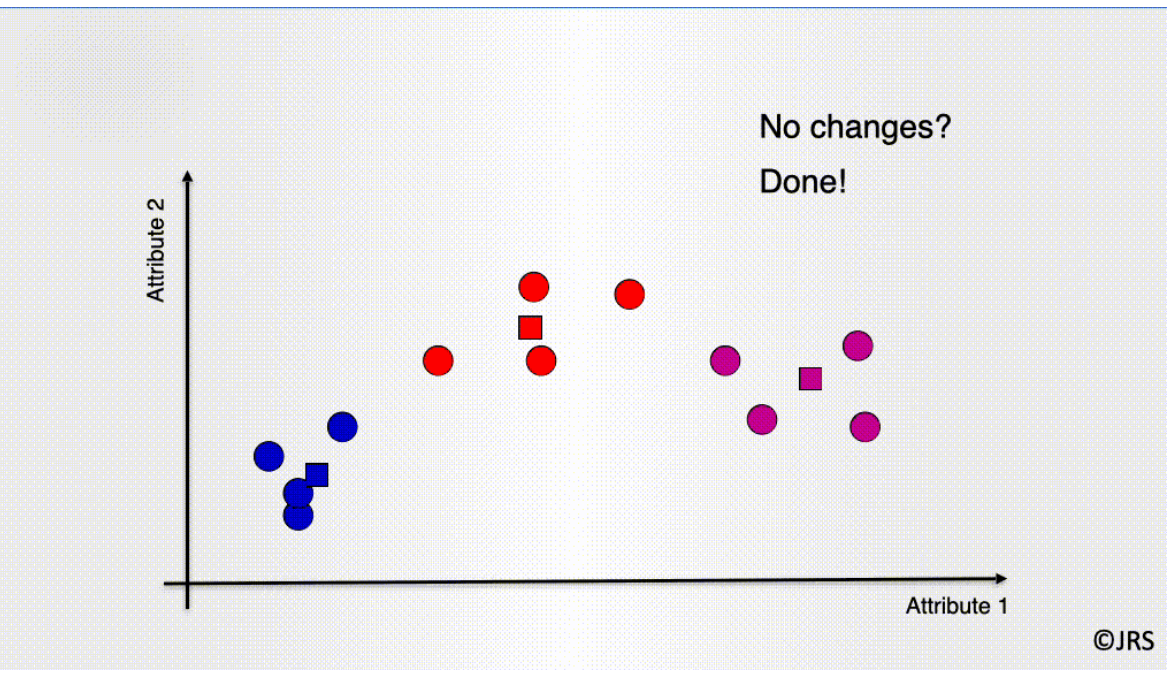

*note: see [the original post by Dr. J Rogel-Salazar](https://blog.dominodatalab.com/getting-started-with-k-means-clustering-in-python) for an animated graphic which builds to the final image above.* 

For the purposes of our implementation, we will take a look at some data with 2 attributes for simplicity. We will then look at an example with more dimension. To get us started we will use a dataset we have prepared and it is available [here](https://figshare.com/ndownloader/files/33950939) with the name **kmeans_blobs.csv**. The data set contains 4 columns with the following information:    

1. ID: A unique identifier for the observation    
2. x: Attribute corresponding to an x coordinate    
3. y: Attribute corresponding to a y coordinate    
4. Cluster: An identifier for the cluster the observation belongs to    


We will discard column 4 for our analysis, but it may be useful to check the results of the application of *k*-means. We will do this in our second example later on. Let us start by reading the dataset:

*note: the **kmeans_blobs.csv** file should be loaded to your current working directory.      
[A copy of the file may also be found on Professor Patrick's Google Drive.](https://drive.google.com/file/d/1xthprqwNf94lY1_sjTMpK4j3MGpXn3DM/view?usp=sharing)*

In [1]:
# You can load a copy of the file from Professor Patrick's Github repo to your CWD
!curl 'https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/kmeans_blobs.csv' -o kmeans_blobs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1175  100  1175    0     0   5568      0 --:--:-- --:--:-- --:--:--  5568


In [2]:
# be sure to have the file kmeans_blobs.csv in your current working directory
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

blobs = pd.read_csv('kmeans_blobs.csv')
colnames = list(blobs.columns[1:-1])
blobs.head() 


,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


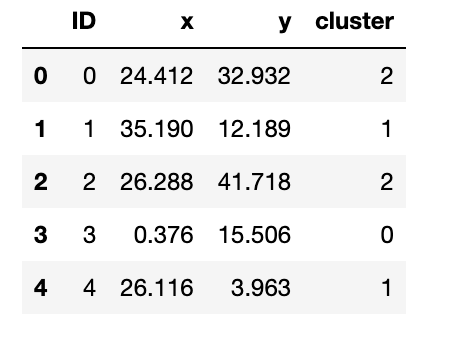

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

Let us look at the observations in the dataset. We will use the Cluster column to show the different groups that are present in the dataset. Our aim will be to see if the application of the algorithm reproduces closely the groupings.

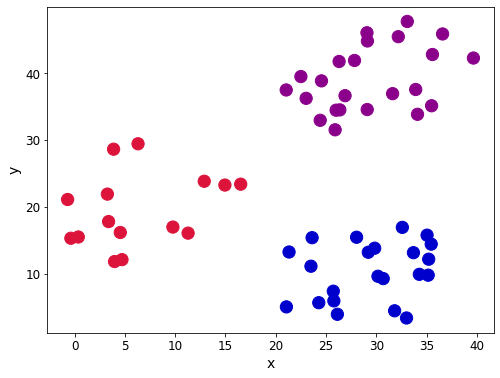

In [3]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150,
            c=blobs['cluster'].astype('category'), 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


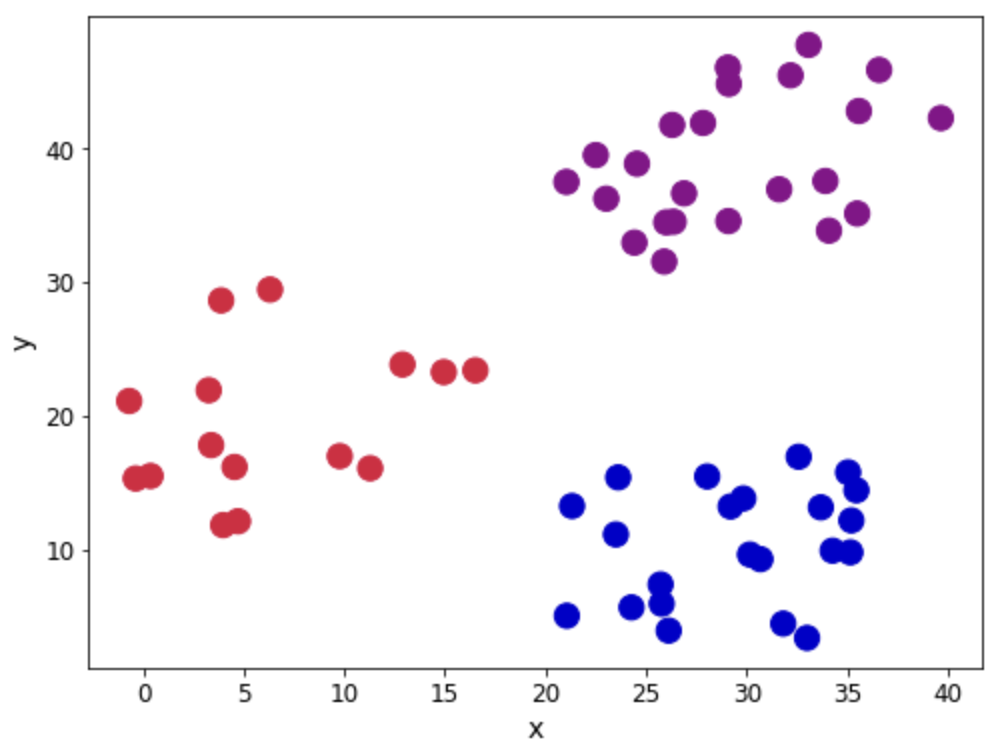

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    




Let's now look at our recipe.

###Steps 1 and 2 - Define *k* and initiate the centroids

First we need 1) to decide how many groups we have and 2) assign the initial centroids randomly. In this case let us consider *k=3* , and as for the *centroids*, well, they have to be in the same range as the dataset itself. So one option is to randomly pick *k* observations and use their coordinates to initialise the centroids:

In [4]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = blobs[['x','y']]
centroids = initiate_centroids(k, df)
centroids


,x,y
0,24.412,32.932
5,25.893,31.515
36,26.878,36.609


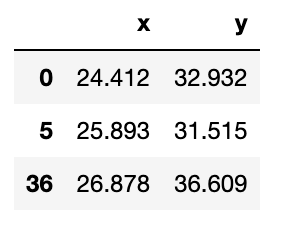

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

###Step 3 - Calculate distance    

We now need to calculate the distance between each of the centroids and the data points. We will assign the data point to the centroid that gives us the minimum error. Let us create a function to calculate the root of square errors:

In [5]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

Let us pick a data point and calculate the error so we can see how this works in practice. We will use point , which is in fact one of the centroids we picked above. As such, we expect that the error for that point and the third centroid is zero. We therefore would assign that data point to the second centroid. Let’s take a look:

In [6]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 384.22
Error for centroid 1: 724.64
Error for centroid 2: 0.00




```
Error for centroid 0: 384.22
Error for centroid 1: 724.64
Error for centroid 2: 0.00
```



>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

###Step 4 - Assign centroids    

We can use the idea from Step 3 to create a function that helps us assign the data points to corresponding centroids. We will calculate all the errors associated to each centroid, and then pick the one with the lowest value for assignation:

In [7]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors


Let us add some columns to our data containing the *centroid* assignations and the error incurred. Furthermore, we can use this to update our scatter plot showing the *centroids* (denoted with squares) and we colour the observations according to the *centroid* they have been assigned to:

In [8]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head() 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,y,centroid,error
0,24.412,32.932,0,0.000000
1,35.190,12.189,1,211534.211314
2,26.288,41.718,2,699.601495
3,0.376,15.506,0,776856.744109
4,26.116,3.963,1,576327.599678


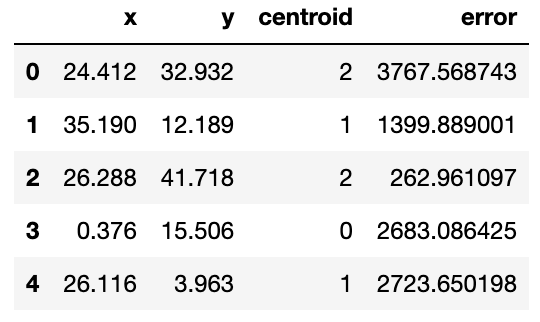

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

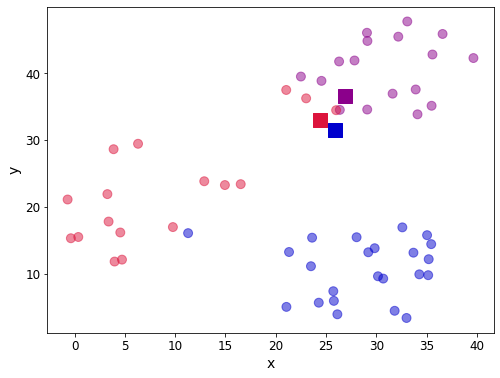

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

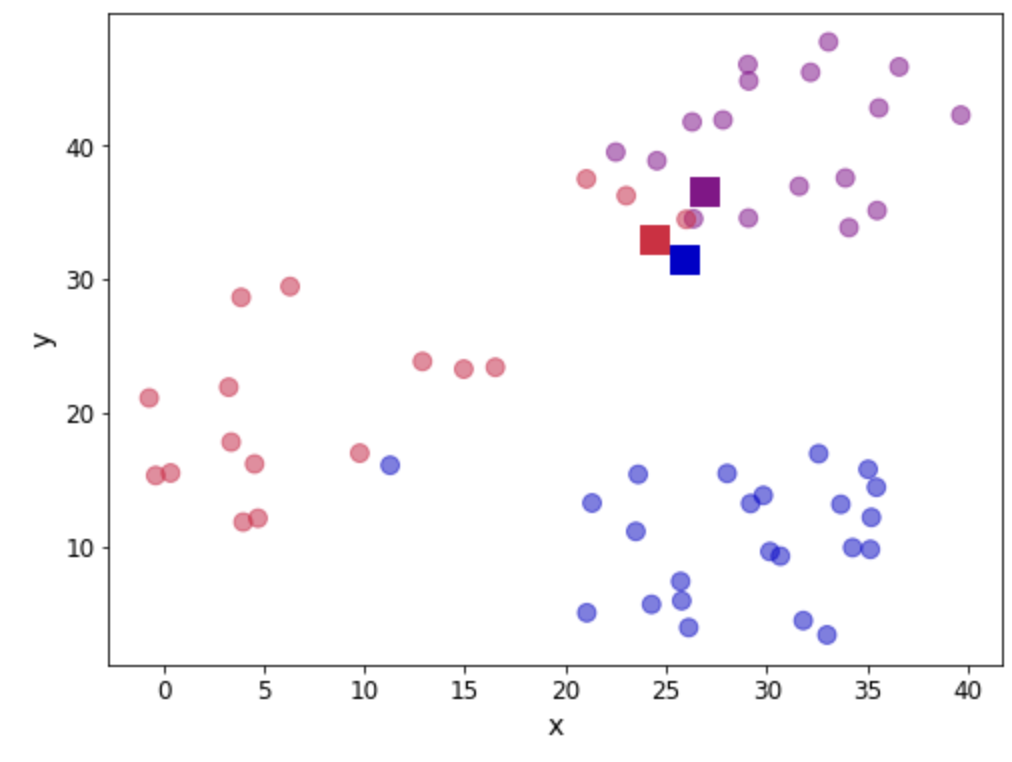

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

Let us see the total error by adding all the contributions. We will take a look at this error as a measure of convergence. In other words, if the error does not change, we can assume that the *centroids* have stabilised their location and we can terminate our iterations. In practice, we need to be mindful of having found a local minimum (outside the scope of this notebook and the source post).

In [ ]:
print("The total error is {0:.2f}".format(df['error'].sum()))

###Step 5 - Update centroid location    


Now that we have a first attempt at defining our clusters, we need to update the position of the *k* *centroids*. We do this by calculating the mean of the position of the observations assigned to each *centroid*. Let take a look:

In [10]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,x,y
0,9.889444,23.242611
1,28.435750,11.546250
2,30.759333,40.311167


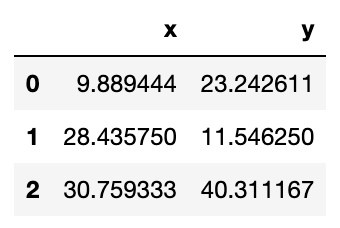

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

We can verify that the position has been updated. Let us look again at our scatter plot:

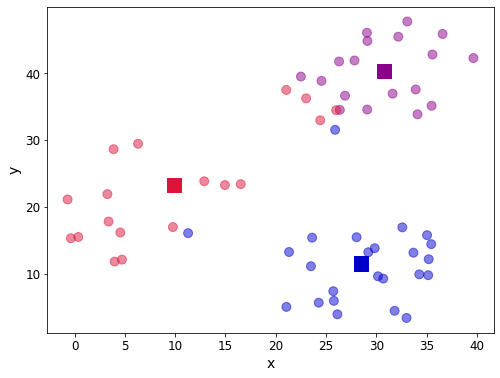

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200,
            c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

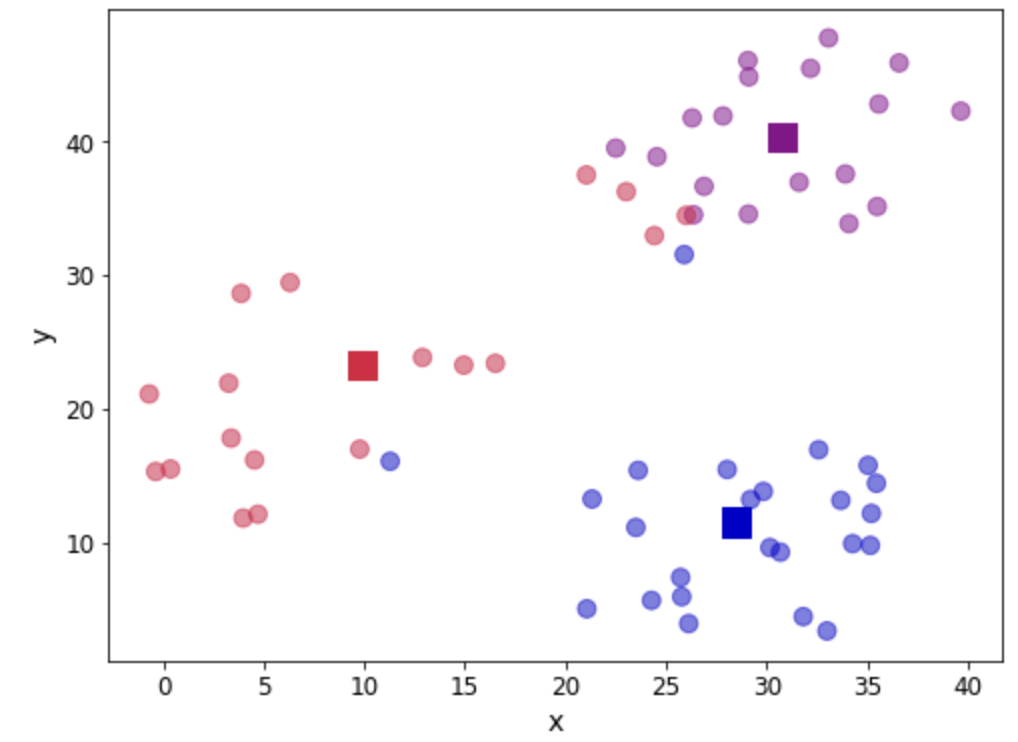

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

###Step 6 - Repeat steps 3-5     

Now we go back to calculate the distance to each *centroid*, assign observations and update the *centroid* location. This calls for a function to encapsulate the loop:

In [12]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementationd for a 
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the orginal
    working_dset = dset.copy()
    # We define some variables to hold the error, the 
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0
    
    # Step 2: Initiate clusters by defining centroids 
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        
        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids 
    

OK, we are now ready to apply our function. We will clean our dataset first and let the algorithm run:

In [13]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['x','y']], 3)
df.head() 


,x,y,centroid,error
0,24.412,32.932,2,3767.568743
1,35.190,12.189,1,1399.889001
2,26.288,41.718,2,262.961097
3,0.376,15.506,0,2683.086425
4,26.116,3.963,1,2723.650198


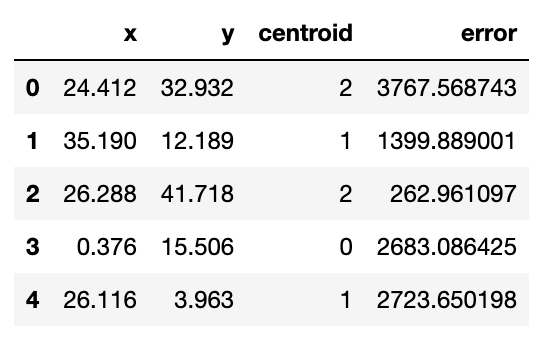

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

Let us see the location of the final *centroids*:

In [14]:
centroids

,x,y
0,6.322867,19.559800
1,29.330864,10.432409
2,29.304957,39.050783


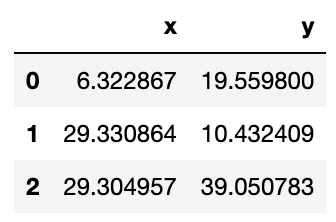

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

And in a graphical way, let us see our clusters:

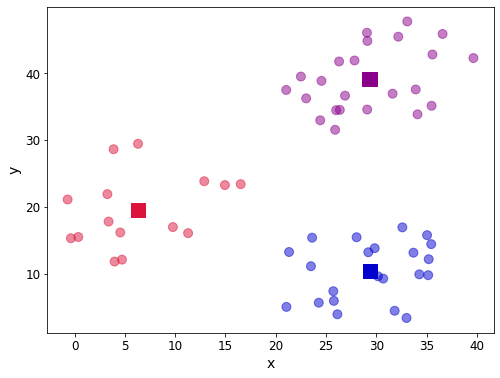

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show() 


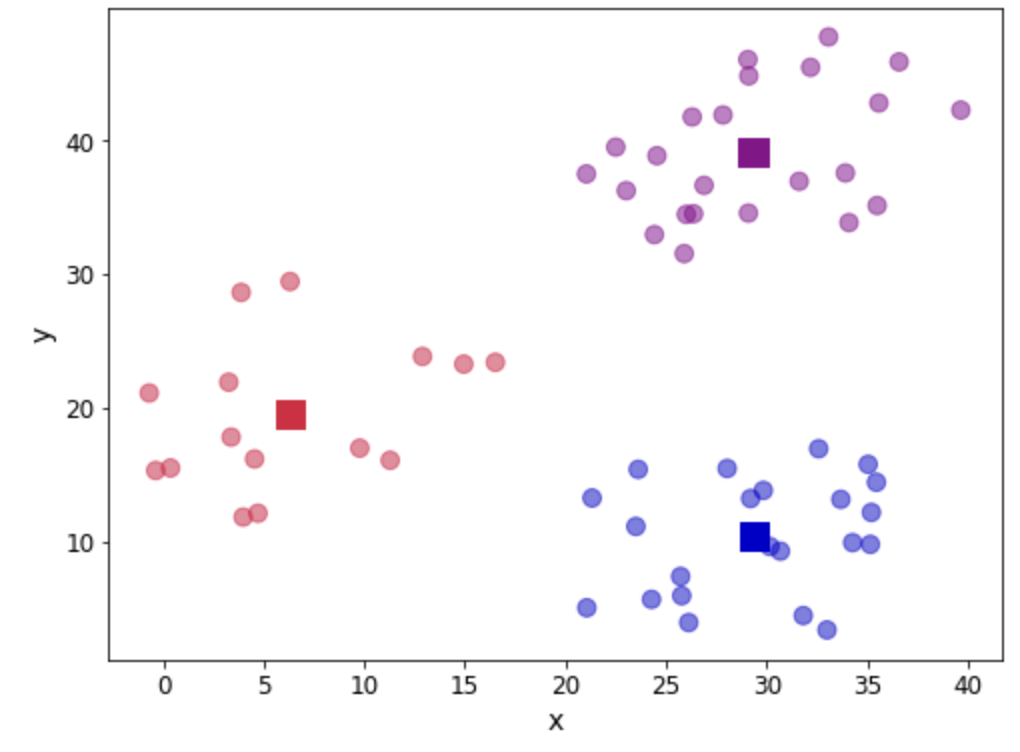

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

---

#2. Determing Optimal Number of Clusters for k-Means    


As we can see the three groups have been obtained. In this particular example the data is such that the distinction between the groups is clear. However, we may not be as lucky in every case. So the question about how many groups there are still remains. We can use a screen plot to help us with the error minimisation by looking at running the algorithm with a sequence **k=1, 2, 3, ...** and look for the “elbow” in the plot indicating a good number of clusters to use:

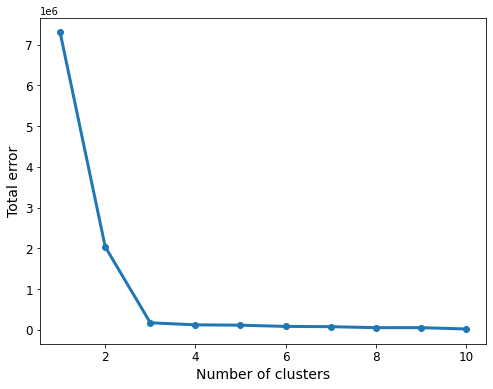

In [16]:
err_total = []
n = 10

df_elbow = blobs[['x','y']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show() 


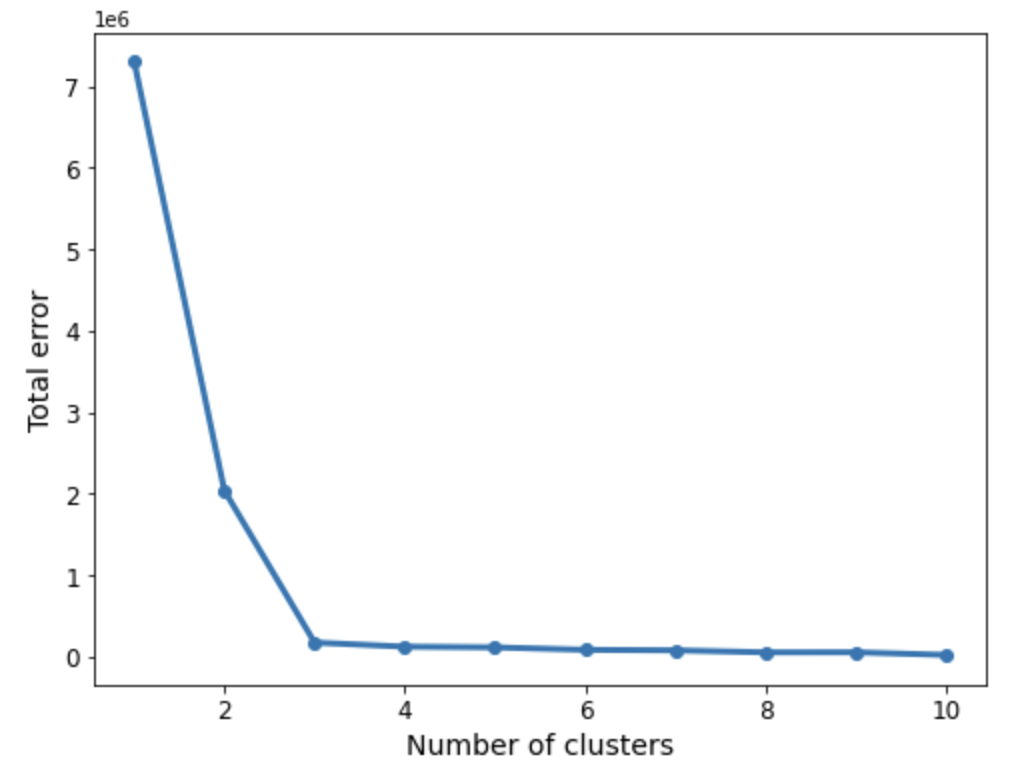

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

We can now apply the “elbow rule” which is a heuristic to help us determine the number of clusters. If we think of the line shown above as depicting an arm, then the “elbow” is the point of inflection. In this case the “elbow” is located between 2 and 4 clusters, giving us an indication that choosing 3 is a good fit.



---



#3. k-Means Using Scikit-learn    

We have seen how to make an initial implementation of the algorithm, but in many cases you may want to stand on the shoulders of giants and use other tried and tested modules to help you with your machine learning work. In this case, Scikit-learn is a good choice and it has a very nice implementation for *k*-means. If you want to know more about the algorithm and its evaluation you can take a look at [Chapter 5 of Data Science and Analytics with Python](https://www.taylorfrancis.com/books/mono/10.1201/9780429446641/advanced-data-science-analytics-python-jes%C3%BAs-rogel-salazar) where Dr. J Rogel-Salazar uses a wine dataset for the discussion. 

In this case we will show how *k*-means can be implemented in a couple of lines of code using the well-known Iris dataset. We can load it directly from Scikit-learn and we will shuffle the data to ensure the points are not listed in any particular order.

In [17]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

# import some data to play with
iris = datasets.load_iris()
X = iris.data 
y = iris.target
names = iris.feature_names
X, y = shuffle(X, y, random_state=42) 


We can call the KMeans implementation to instantiate a model and fit it. The parameter `n_clusters` is the number of clusters *k*. In the example below we request 3 clusters:  

In [18]:
model = KMeans(n_clusters=3, random_state=42) 
iris_kmeans = model.fit(X) 


That is it! We can look at the labels that the algorithm has provided as follows:

In [19]:
iris_kmeans.labels_

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2], dtype=int32)



```
array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,

       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,

       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

       1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0,

       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,

       1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,

       0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2], dtype=int32)
```



>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

In order to make a comparison, let us reorder the labels:

In [20]:
y = np.choose(y, [1, 2, 0]).astype(int)
y

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0])



```
array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,

       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1,

       1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1,

       2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1,

       1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,

       2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0,

       1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0])
```



>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

We can check how many observations were correctly assigned. We do this with the help of a confusion matrix:  

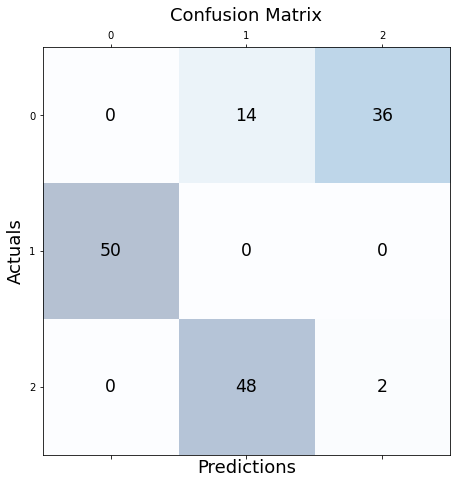

In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, iris_kmeans.labels_) 

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show() 


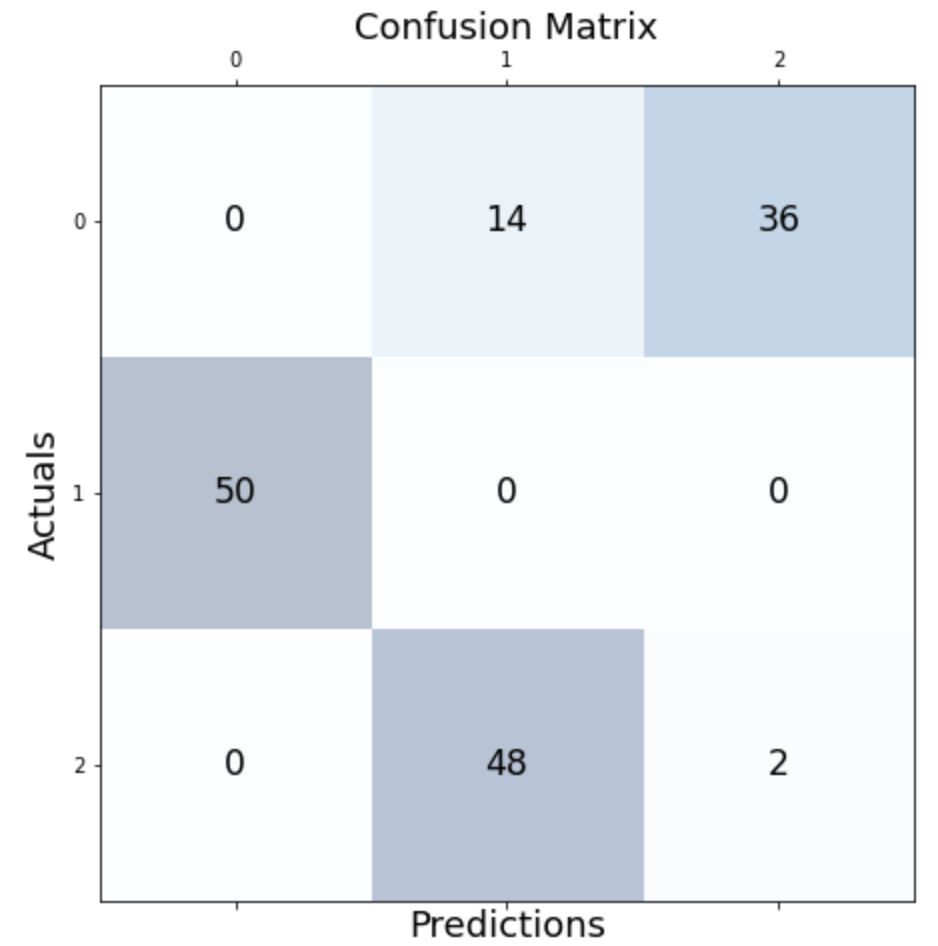

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

As we can see, most of the observations were correctly identified. In particular those for cluster 1 seem to all have been captured.

Let us look at the location of the final clusters:

In [22]:
iris_kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])



```
array([[5.006     , 3.428     , 1.462     , 0.246     ],

       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],

       [6.85      , 3.07368421, 5.74210526, 2.07105263]])
```



>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    

And we can look at some 3D graphics. In this case we will plot the following features:    

* Petal width
* Sepal length
* Petal length    


As you can see, there are a few observations that differ in colour between the two plots.

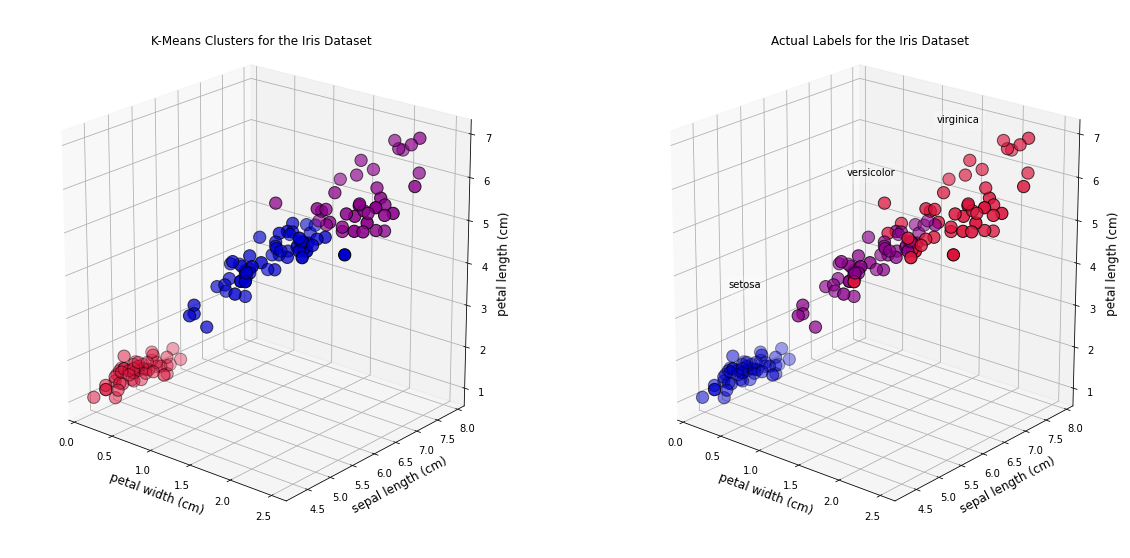

In [23]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 3], X[:, 0], X[:, 2], 
            c=iris_kmeans.labels_.astype(float), 
           edgecolor="k", s=150, cmap=customcmap)
ax1.view_init(20, -50)
ax1.set_xlabel(names[3], fontsize=12)
ax1.set_ylabel(names[0], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for label, name in enumerate(['virginica','setosa','versicolor']):
    ax2.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax2.scatter(X[:, 3], X[:, 0], X[:, 2], 
            c=y, edgecolor="k", s=150, 
            cmap=customcmap)
ax2.view_init(20, -50)
ax2.set_xlabel(names[3], fontsize=12)
ax2.set_ylabel(names[0], fontsize=12)
ax2.set_zlabel(names[2], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=12)
fig.show() 


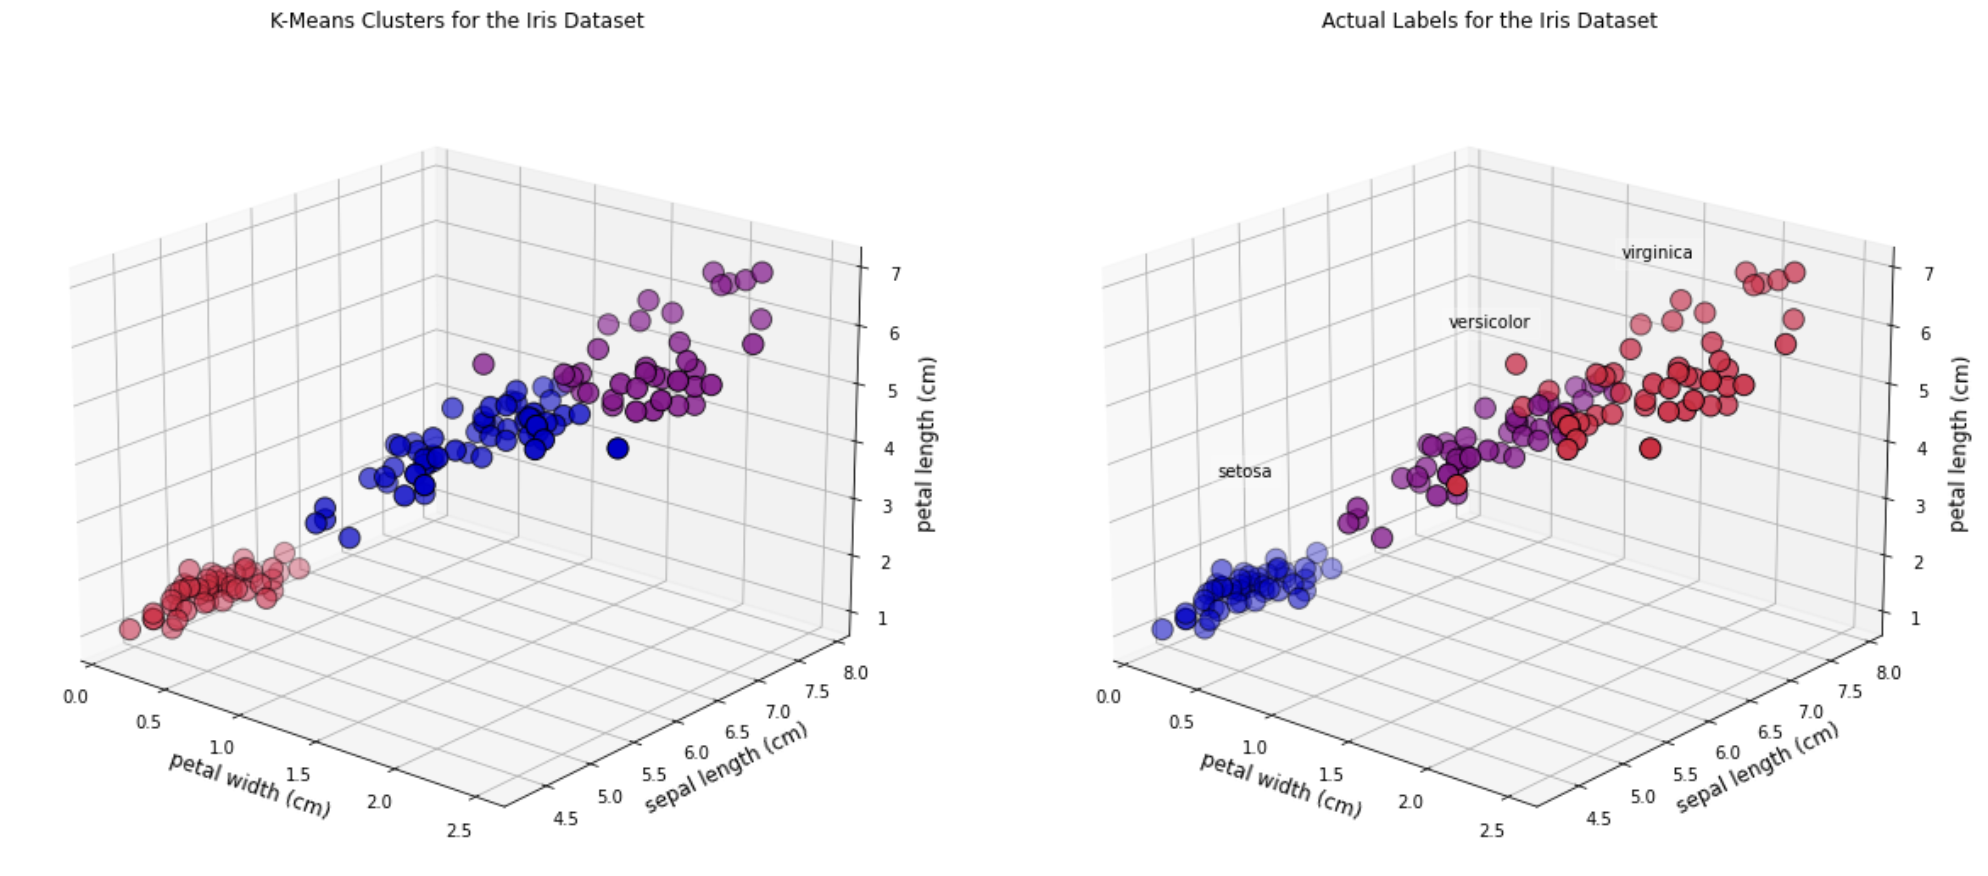

>*Figure from Dr. Rogel-Salazar to compare to your output (above)*    



---



#Summary    

In this post we have explained the ideas behind the -means algorithm and provided a simple implementation of these ideas in Python. I hope you agree that it is a very straightforward algorithm to understand and in case you want to use a more robust implementation, Scikit-learn has us covered. Given its simplicity, -means is a very popular choice for starting up with clustering analysis. 

To work with the Domino Project *k*-means clustering in Python you can [click here](https://blog.dominodatalab.com/cs/c/?cta_guid=4b9577b3-066b-490a-a944-814ab03755e8&signature=AAH58kGCfK_mJAkhY8OdHE-gBdMdouveoQ&pageId=69713877806&placement_guid=500a29d5-ba21-4a76-b924-8dcfcc946173&click=e9bb547b-824e-4219-987c-c40ec7fdffed&hsutk=a9a7c15728741cb530aebcf924fdf884&canon=https%3A%2F%2Fblog.dominodatalab.com%2Fgetting-started-with-k-means-clustering-in-python&utm_referrer=https%3A%2F%2Fcolab.research.google.com%2F&portal_id=6816846&redirect_url=APefjpEZFnGT4WWY9kgnFLgwyFV4jUv6IWznNXVlF5xXR2bqrgVf4XKy5mW0ffW4FRpqPXc3B8DsmxVwng3aISo6y_2FeTFP6q1sQPZurLSi6_wvPOJw3cB5VsXM7D0EttVe3fae1CCXYcg0sveF3ll5M1rJedyWnh_Vk7D7Ru1krRLbMduPTm8VxTVMa5m294Gi7locJ69oWGJ4QlpMq0B3yics8_8e2sTr7PeBsxCp2RLldreDGI1lLGX2RVmcHZRQsPE1UTR3xud8l9RC04NRBcxJVunJM9ixmSD9v10DZgRPGjsW-UjQVnqGeIQkTWT4WXQrzyFM&__hstc=218942598.a9a7c15728741cb530aebcf924fdf884.1632838232646.1651017000681.1651070176782.4&__hssc=218942598.1.1651070176782&__hsfp=1688644645&contentType=blog-post).



#Reference     

* [What Is Cluster Analysis?](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf)  class slides by Prof. Madigan at Columbia University *(.PDF file)*

* [What Is Cluster Analysis?  When Should You Use It For Your Survey Results?](https://www.qualtrics.com/experience-management/research/cluster-analysis/)  from Qualtrics.com

* [Comparing Clustering Algorithms](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html) from hdbscan.readthedocs.io     

* [Hierarchical clustering that takes advantage of both density-peak and density-connectivity](https://arxiv.org/pdf/1810.03393.pdf) paper by Ye Zhu, et al *(.PDF file)*

* [Lighting Talk: Clustering with HDBScan](https://towardsdatascience.com/lightning-talk-clustering-with-hdbscan-d47b83d1b03a) by Brendan Dailey in TowardsDataScience.com 

* [Clustering Jupyter notebook](https://colab.research.google.com/drive/1hj0R5bbVTlKZ-d0Cda-4cwi62fBPr8Iy#scrollTo=KGm_pcjC0SJF) from CityTech CST Data Mining class *(demonstrates HDBScan vs k-Means clustering)*    

* [10 Clustering Algorithms With Python](https://machinelearningmastery.com/clustering-algorithms-with-python/) by Jason Brownlee on April 6, 2020 in MachineLearningMastery.com    





---

